In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [41]:
# read in data 
df = pd.read_csv('alpha_beta_1.csv')

# read in data as a numpy array 
data = np.loadtxt('alpha_beta_1.csv', delimiter=',')

vel = data[:,0]
alpha = data[:,1]
beta = data[:,2]

"""
# add a top row headers
df.columns = ['v','alpha', 'beta']
vel = df['v']
alpha = df['alpha']
beta = df['beta']
data.shape
"""

"\n# add a top row headers\ndf.columns = ['v','alpha', 'beta']\nvel = df['v']\nalpha = df['alpha']\nbeta = df['beta']\ndata.shape\n"

In [35]:
df

,8.05,2.34250930459486,40.9766664457436
0,8.15,2.272778,43.218966
1,8.25,2.254358,44.534177
2,8.35,2.227049,44.895038
3,8.45,2.236968,44.073015
4,8.55,2.202511,45.042891
...,...,...,...
64,14.55,2.010995,60.712096
65,14.65,2.007826,63.946396
66,14.75,1.962617,66.331016
67,14.85,2.003087,62.347567


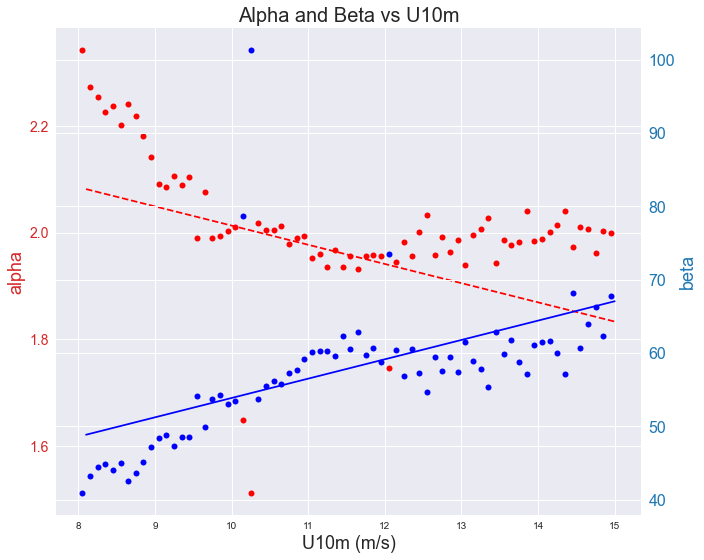

In [43]:
U_fine = np.linspace(8.1, 15, 100)
alpha_fine = -0.036*U_fine+2.3736
beta_fine = 2.6376*U_fine+27.5125

# plot with 2 y axis one for alpha and one for beta
fig, ax1 = plt.subplots(figsize=(10, 8))

# plt style seaborn
plt.style.use('seaborn')


color = 'tab:red'
ax1.set_xlabel('U10m (m/s)',fontsize = 18)
ax1.set_ylabel('alpha', color=color,fontsize = 18)
ax1.plot(vel, alpha,'r.',markersize = 12, label = 'alpha')
ax1.plot(U_fine, alpha_fine, 'r--', label = 'alpha fit')
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('beta', color=color,fontsize = 18)  # we already handled the x-label with ax1
ax2.plot(vel, beta, 'b.',markersize = 12, label = 'beta')
ax2.plot(U_fine, beta_fine, 'b-', label = 'beta fit')
ax2.tick_params(axis='y', labelcolor=color)

# set font size for ticks and labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alpha and Beta vs U10m', fontsize = 20)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




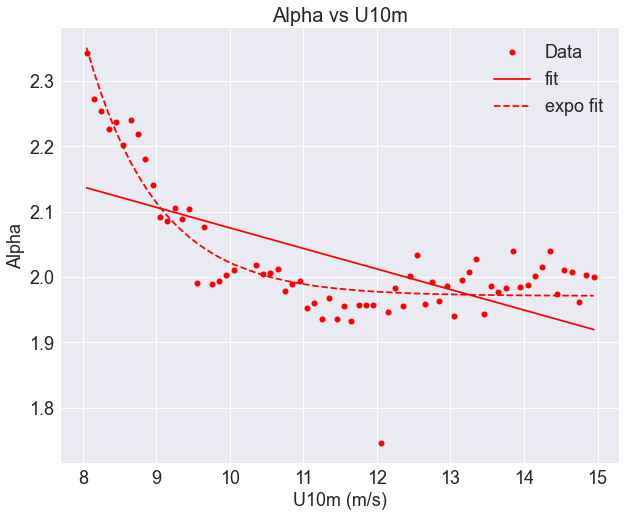

[1.53100779e+03 1.03121811e+00 1.97125628e+00]


In [57]:
# new fit for alpha and beta

alpha_new = alpha[alpha>1.7]
U_new_1 = vel[alpha>1.7]

# fit a linear line to the data
m, b = np.polyfit(U_new_1, alpha_new, 1)

# exponential fit to the data   
def expo_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# fit the data to the function
from scipy.optimize import curve_fit
popt, pcov = curve_fit(expo_fit, U_new_1, alpha_new, p0=(2, 0.1, 1))

plt.figure(figsize=(10, 8))
# plot the data and the fit
plt.plot(U_new_1, alpha_new, 'r.', label='Data',markersize = 12)
plt.plot(U_new_1, m*U_new_1 + b, 'r-', label='fit')
plt.plot(U_new_1, expo_fit(U_new_1, *popt), 'r--', label='expo fit')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.title('Alpha vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

# output coefficinets of exponential fit
print(popt)





In [50]:
m,b

(-0.0314454449351751, 2.389850955578412)

In [54]:
m,b

(-0.03095762073226184, 2.388179456786592)

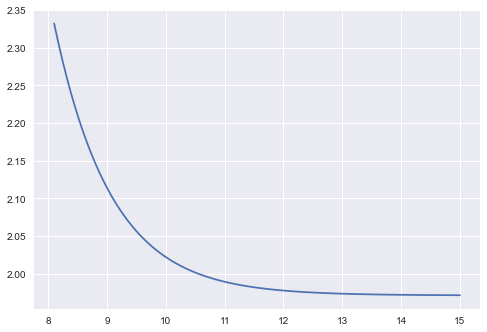

In [59]:
l = np.linspace(8.1, 15, 100)
fit = popt[0]*np.exp(-popt[1]*l) + popt[2]
plt.plot(l,fit)